# "Trends on Trends" - An Analysis of the Youtube Creator's influence on video trendability.


This project will explore how the Youtube creator affects the path from viewer to view, within the Youtube platform (excluding outside factors). 

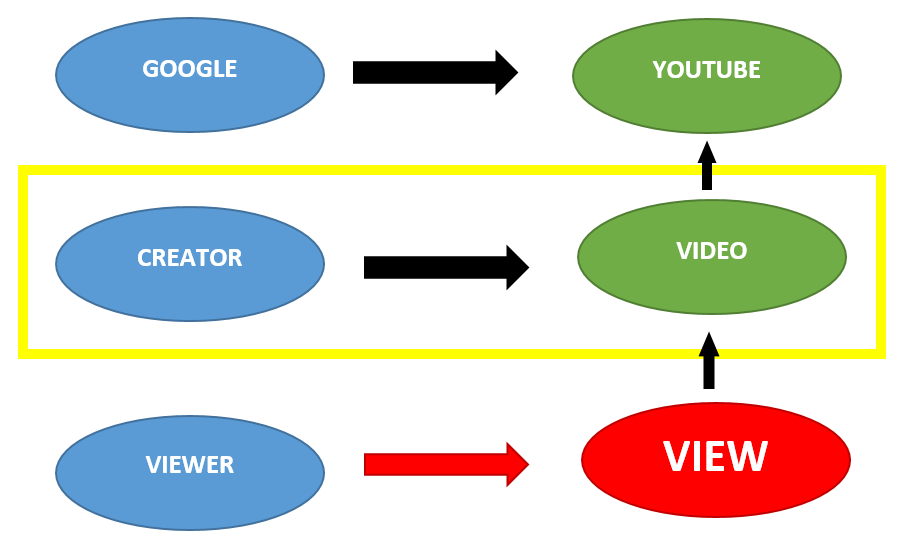

In [169]:
from IPython.display import Image
Image(filename='Youtube Relationship - Diagram.PNG') 

## QUESTIONS TO EXPLORE

WHAT? 
* Is there a correlation between CONTENT properties inputted by the creator and trendability? 
* Is there a correlation between the creator's publishing TIMELINE and trendability? 

WHY?
* For Creators, are there any opportunities and or suggested behavior to encourage trendability?
* For Youtube, is it worthwhile to spend additional resources on the Youtube Creator? Are there any suggested changes to the existing platform?

## DATA BACKGROUND & PREVIEW

### What data is available?
* Source: https://www.kaggle.com/datasnaek/youtube-new
* "Daily Record of the Top Trending Youtube Videos"
* Up to 200 trending videos per day
* Two dataframes with the same columns (19). 
    * 'df' should contain one line per video with final numbers 
    * "df_all_timestamps" should contain snapshots throughout the day. 

### Limitations
* No data on the viewers or path to arrive to video. 
* Only 1 property of channel to be attributed to Youtube creator. More information on creator could lead to further insights.

### Unanswered Questions
* What defines "trending"? 
    * What is the metric? Assumption: Unknown internal measure (Top X videos by views / time_unit)
    * Dynamic - Constantly changes throughout day (e.g. Jan 3 - 184, Jan 4 - 828, Jan 5 - 875).
    * Does it change by viewer's geographical region?
* What is "country''?

### Manipulations

DF
* Added tag_count column (which split the string in the tags column and added the individual elements)
* Replaced existing publish date column with data type "object" with new one with data type "datetime"
* Replaced existing trending date column with data type "object" with new one with data type "datetime"
* Added publish day of the week column
* Added trending day of the week column
* Added Time Live and Days Live columns

OTHERS
* New dataframe called "channel_count" created for Multiple Trenders analysis

In [156]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

In [3]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

datapath1 = os.path.join('..',filename1)
datapath2 = os.path.join('..',filename2)

In [4]:
df = pd.read_csv(datapath1)
df_all_timestamps = pd.read_csv(datapath2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


In [8]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


In [9]:
# converting date field

def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = pd.to_datetime(df_all_timestamps['string_date_time'], infer_datetime_format=True, errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = pd.to_datetime(df['string_date_time'], infer_datetime_format=True, errors='coerce')
df = df.drop('string_date_time', axis=1)

In [10]:
# made new column called trending_timestamp converting trending date object to datetime

df.loc[:,'trending_timestamp'] = pd.to_datetime(df['trending_date'], infer_datetime_format=True, errors='coerce')

In [11]:
df = df.drop('trending_date', axis=1)

In [12]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [13]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 25 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [15]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10 17:00:03
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33


## EFFECT OF CONTENT

The Youtube Creator has a lot of control over the properties of the channel and video. The following properties within dataframe are manually entered by the creator: Title, Description, Thumbnail, Tags, Category, Comments Disabled, and Ratings Disabled. This section will explore if the content properties from the creator have any correlation with trendability. 

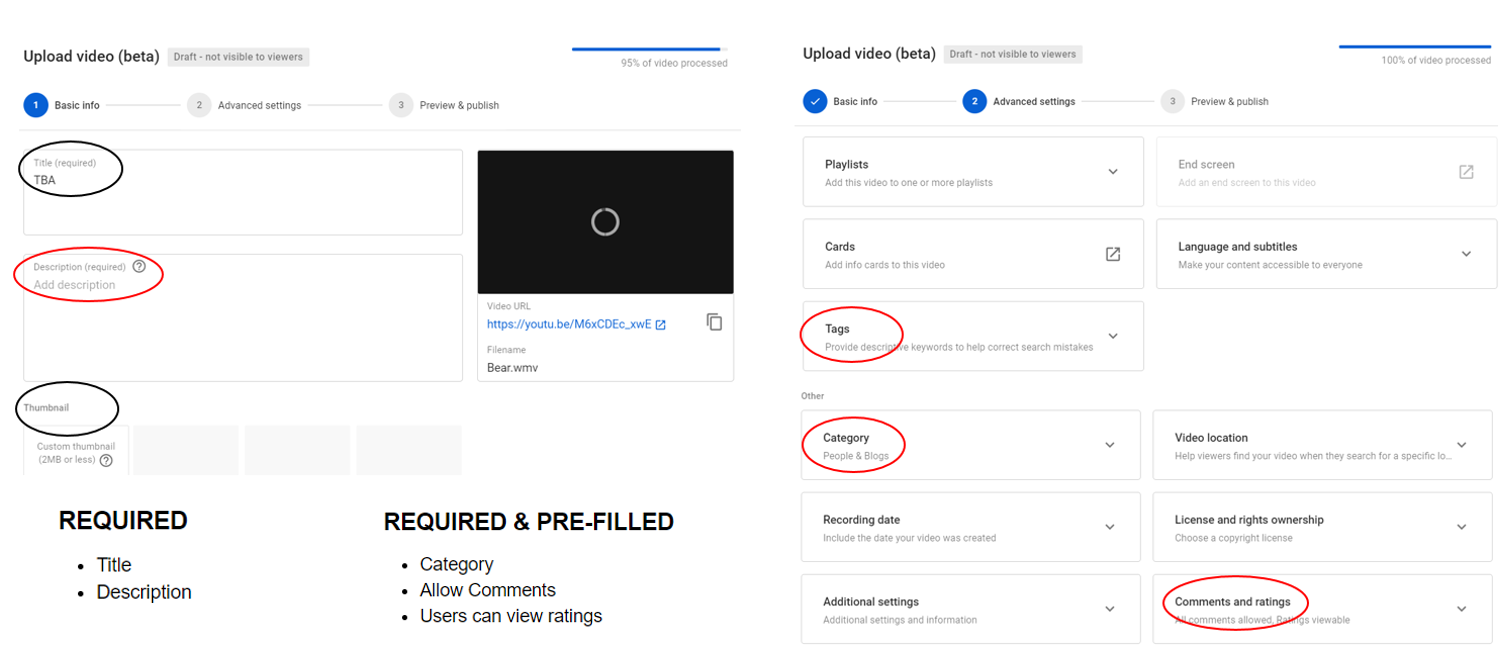

In [175]:
# Image of Youtube Upload Video windows with properties for the creator to select
# df contains data on all circled properties, but this section will address the red ones

from IPython.display import Image
Image(filename='upload_video_content.PNG') 

### ••• CATEGORY •••

* Category is subjectively chosen by the creator. 
* Although 'Entertainment' is the most popular category, a closer looks shows that it is used broadly instead of better matching categories
* With this in mind, is a better solution to make categories more descriptive for Youtube OR should the creator play around this?
* If 'Entertainment' videos trend better and assuming category is used in suggestion algorithms, the Youtube creator should consider if he/she would prefer to use a wider category that may reach more people but might not fit what the viewer is looking for OR if they prefer to select the category that better matches their video, targets less viewers, is less competitive, and perhaps it is more relevant to what the viewer is looking for. 

In [19]:
category_count = df['category'].value_counts()
print(category_count)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

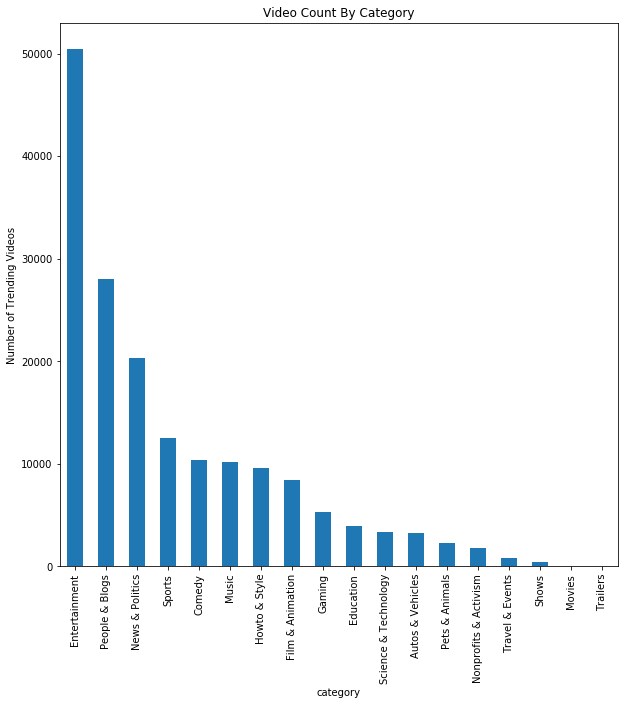

In [20]:
# Bar plot per category

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
category_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Category') # Give the plot a main title
ax.set_xlabel('category') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis



In [82]:
# Is Entertainment category more popular OR is it used very leniently, based on US?
# Qualitative Assessment - Are the Top 5 US videos properly categorized into Entertainment?

entertainment = df['category'] == 'Entertainment'
US = df['country'] == 'US'
df[entertainment & US].head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day,trending_day,Time_Live,Days_Live
322,zYWt2mnalP8,2017-11-14,How To Do Thanksgiving Makeup That Has Nothing...,Sailor J,24,Entertainment,2017-11-08,00:03:47,"Thanksgiving|""Tutorial""|""Makeup""",160477,8388,691,950,https://i.ytimg.com/vi/zYWt2mnalP8/default.jpg,False,False,False,Center for American Indian Research & Native S...,US,2017-11-08 00:03:47,2017-11-14,11.985912,9.034677,6.539586,6.857514,3,Wednesday,Tuesday,5 days 23:56:13,5
666,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...,US,2017-11-10 09:35:00,2017-11-14,14.219321,9.648918,5.869297,6.989335,26,Friday,Tuesday,3 days 14:25:00,3
672,F-j_6IuaYfw,2017-11-14,I Miss the Old Taylor,Wong Fu Productions,24,Entertainment,2017-11-08,21:05:20,"taylor swift|""swiftie""|""reputation""|""ready for...",476389,16106,950,2077,https://i.ytimg.com/vi/F-j_6IuaYfw/default.jpg,False,False,False,A new Taylor Swift is upon us! Some people jus...,US,2017-11-08 21:05:20,2017-11-14,13.073992,9.687009,6.857514,7.639161,23,Wednesday,Tuesday,5 days 02:54:40,5
674,Y6eKxjMA9ek,2017-11-14,"Dropping And CATCHING A Paper Airplane At 2,00...",Tucker Gott,24,Entertainment,2017-11-09,16:00:09,"paramotor|""tucker""|""gott""|""tucker gott""|""param...",175852,15909,200,852,https://i.ytimg.com/vi/Y6eKxjMA9ek/default.jpg,False,False,False,After failing the paper airplane drop a few ye...,US,2017-11-09 16:00:09,2017-11-14,12.077404,9.674703,5.303305,6.748760,36,Thursday,Tuesday,4 days 07:59:51,4
675,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,US,2017-11-09 09:00:07,2017-11-14,12.844634,8.638171,4.990433,6.516193,26,Thursday,Tuesday,4 days 14:59:53,4


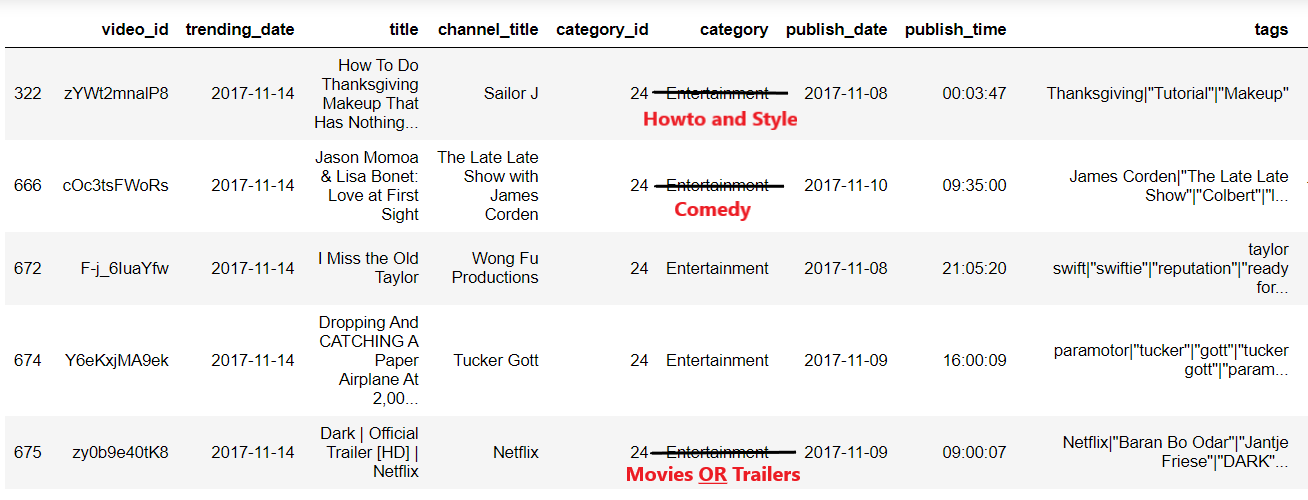

In [86]:
# No! From the US top 5, you can see a makeup tutorial & a movie trailer clearly miscategorized

Image(filename='top5_us_category_review.PNG') 

### ••• DESCRIPTION LENGTH ••• 

* Description length count does not correlate with views but we can see patterns on how long are the descriptions 'trending' views tend to have. 
* Assuming description factor into Youtube search algorithms, we can make recommendations on description_length.
* The average description_length of trending videos is 536 characters and it should be kept within 225 and 536 (the range followed by 50% of trending videos).

In [22]:
no_description = df['description'] == None
df[no_description]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count


In [104]:
df['description_length'] = None
df['description_length'] = df['description'].str.len()

In [110]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day,trending_day,Time_Live,Days_Live,description_length
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44,Sunday,Tuesday,1 days 06:01:03,1,288
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9,Sunday,Tuesday,1 days 10:13:42,1,375
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8,Sunday,Tuesday,1 days 04:51:52,1,216
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22,Monday,Tuesday,0 days 04:01:27,0,344
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6,Monday,Tuesday,0 days 10:26:34,0,42


Text(0, 0.5, 'views')

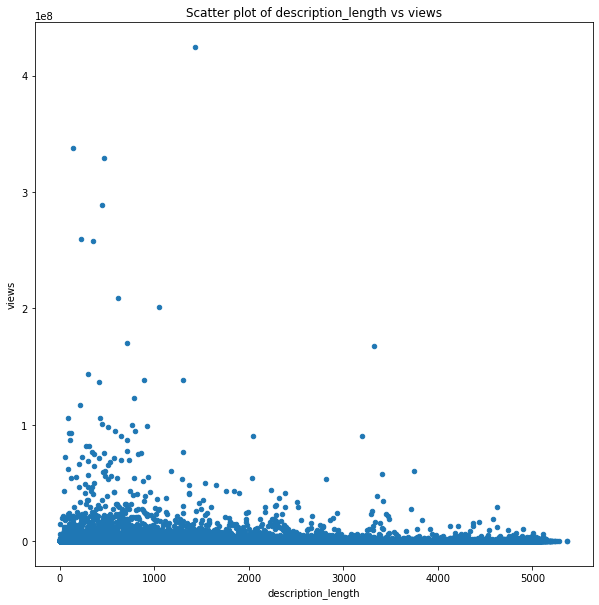

In [108]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'description_length', y = 'views', ax = ax)
ax.set_title('Scatter plot of description_length vs views')
ax.set_xlabel('description_length')
ax.set_ylabel('views')

In [111]:
df['description_length'].describe()

count    171149.000000
mean        800.058656
std         835.311361
min           1.000000
25%         225.000000
50%         536.000000
75%        1065.000000
max        5369.000000
Name: description_length, dtype: float64

### ••• TAG COUNT •••

* Tag count does not directly correlate with views but we can see patterns on how many tags 'trending' views tend to have. 
* Assuming tags factor into Youtube search algorithms, we can make recommendations on tag_count.
* The average tag count of trending videos is 17 and it should be kept within 7 and 25 (the range followed by 50% of trending videos). Every trending video has at least 1 so it should be not left blank.


In [23]:
# every video has tags

no_tags = df['tags'] == None
df[no_tags]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count


In [24]:
# make new column called tag_count

df['tag_count'] = None

In [25]:
# put data into the column

df['tag_count'] = df['tags'].str.split(r'|')
df.loc[:,'tag_count'] = df['tag_count'].apply(lambda x: len(x))
        

In [26]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6


Text(0, 0.5, 'Views')

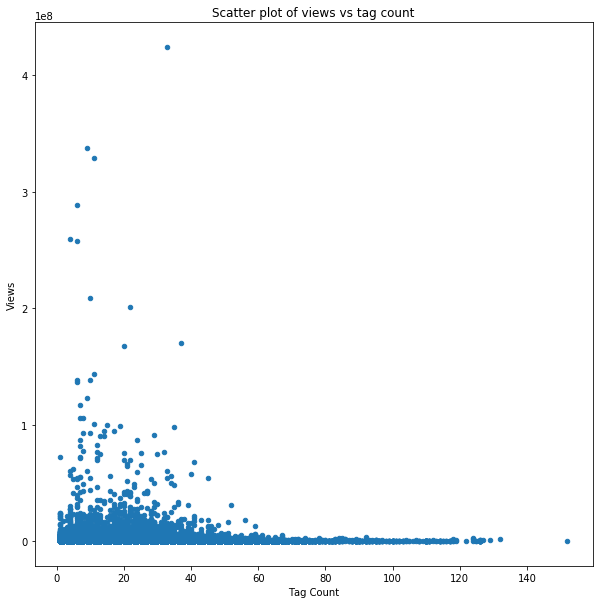

In [27]:
# Tag count vs views

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'tag_count', y = 'views', ax = ax)
ax.set_title('Scatter plot of views vs tag count')
ax.set_xlabel('Tag Count') 
ax.set_ylabel('Views')

In [28]:
df['tag_count'].describe()

count    171149.000000
mean         17.148222
std          13.284787
min           1.000000
25%           7.000000
50%          15.000000
75%          25.000000
max         152.000000
Name: tag_count, dtype: float64

### ••• TAG CONTENT ••• (IN PROGRESS)

This subsection will look at qualitative data in the Tag field

*.

In [124]:
for x in df['tags'].values:
    tag_list = []
    tag_list.append(x)

print(tag_list)

['call of duty|"cod"|"activision"|"Black Ops 4"']


In [130]:
tags_in_df = pd.DataFrame(columns=["tags", "tag_count"])
tags_in_df

,tags,tag_count


In [154]:
tag_list = df['tags'].values

### ••• OPENNESS TO FEEDBACK (COMMENTS & RATINGS) •••

* The grand majority of videos are open to feedback with 98% open to comments and 98% open to ratings
* Less than 1 percent (0.67%) are closed to both ratings and comments. 
* For Youtube creators: it is important to note that trending videos overwhelming tend to be open to feedback and if trendability/popularity is the goat, their videos should follow this pattern.

In [29]:
# open to comments? - count

comments_disabled_count = df['comments_disabled'].value_counts()
print(comments_disabled_count)

False    167027
True       4122
Name: comments_disabled, dtype: int64


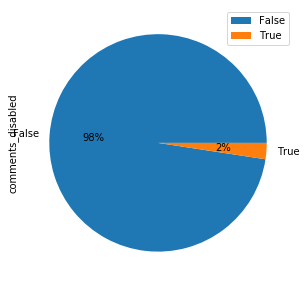

In [30]:
# open to comments? - proportion

df2 = pd.DataFrame(comments_disabled_count)
plot = df2.plot.pie(y='comments_disabled', figsize=(5, 5), autopct='%1.0f%%')

In [31]:
# open to ratings? - count

ratings_disabled_count = df['ratings_disabled'].value_counts()
print(ratings_disabled_count)

False    167159
True       3990
Name: ratings_disabled, dtype: int64


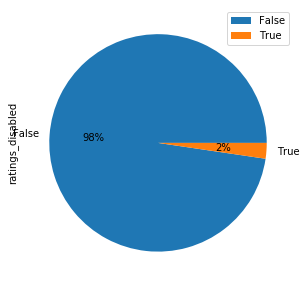

In [32]:
# open to ratings? - proportion

df3 = pd.DataFrame(ratings_disabled_count)
plot = df3.plot.pie(y='ratings_disabled', figsize=(5, 5), autopct='%1.0f%%')

In [33]:
# What is the overlap? Closed to both comments are ratings. 

df4 = df[(df.ratings_disabled == True) & (df.comments_disabled == True)]

len(df4)

1153

In [34]:
# closed videos / total videos
# as a percentage

(len(df4)/len(df))*100

0.6736819963891113

## EFFECT OF TIME

Some video properties stem from the Youtube Creator's actions: particularly publish time and frequency of uploads. This section will explore possibly opportunities related to the timeline of video uploads. 

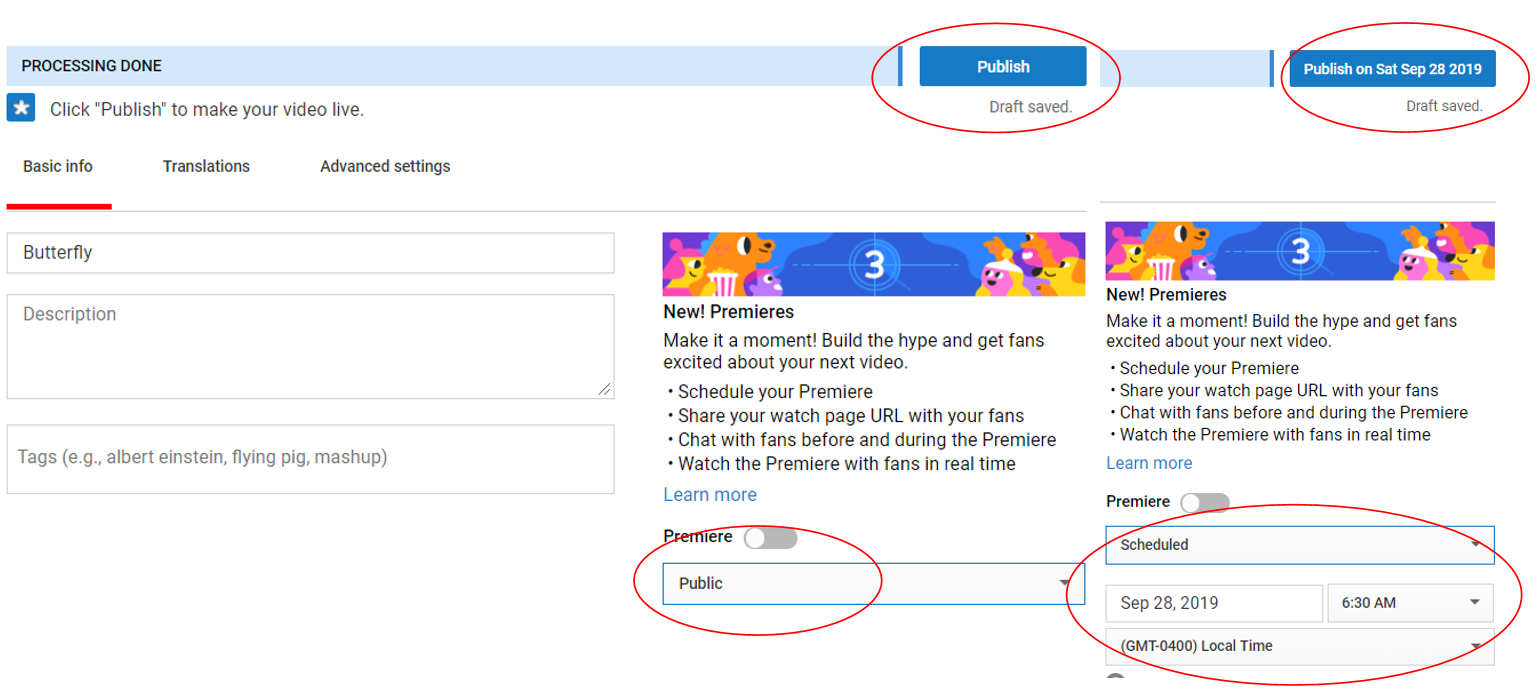

In [177]:
# Image of Youtube Publish Video window with properties for the creator to select 
# Left image with Publish (now) option, plus right portion added with Scheduled option selected

from IPython.display import Image
Image(filename='upload_video_time.PNG') 

### ••• PUBLISH DATE ••• 

* Publish date is generated when the Creator uploads the video and hence in his control.
* The day of the week is pretty evenly split so the difference between days is not drastic. However... when placed in video count order, there seems to be a preference and/or strategic decision to publish on weekdays (Saturday and Sunday had the least amount)
* Friday is the most popular day to publish, perhaps getting ahead of the weekend?

In [35]:
df['publish_day'] = None

In [36]:
df['publish_day'] = df['publish_timestamp'].dt.dayofweek

In [37]:
df.head(50)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44,6
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9,6
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8,6
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22,0
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6,0
5,k0OruM7tneA,2017-11-14,الإعلام المصري : شكون فالمنتخبات العربية لي ...,AR-EN-FR LANGUAGES,17,Sports,2017-11-13,12:08:26,"المنتخب""|""المغربي""|""دخل""|""التاريخ""|""وهو""|""أول""...",48650,486,69,238,https://i.ytimg.com/vi/k0OruM7tneA/default.jpg,False,False,False,الإعلام المصري : شكون فالمنتخبات العربية لي غ...,FR,2017-11-13 12:08:26,2017-11-14,10.792428,6.188264,4.248495,5.476464,30,0
6,z4PWAu9HfxM,2017-11-14,No hablo (Vidéoclip),Thomas Gauthier,23,Comedy,2017-11-12,17:30:01,"TomliTV""|""deuxième""|""channel""|""vlogs""|""Thomas""...",38245,6849,27,332,https://i.ytimg.com/vi/z4PWAu9HfxM/default.jpg,False,False,False,"Mon terrible secret...\nPartage, aime et comme...",FR,2017-11-12 17:30:01,2017-11-14,10.551794,8.832004,3.332205,5.808142,24,6
7,4HeOSihd32A,2017-11-14,LES GAMERS [Version intégrale] - Les Reportage...,ERTV Officiel,25,News & Politics,2017-11-13,14:31:33,"Gaming""|""gamers""|""Vincent Lapierre""|""jeux vidé...",14854,774,34,118,https://i.ytimg.com/vi/4HeOSihd32A/default.jpg,False,False,False,Le marché des jeux vidéo connaît depuis une vi...,FR,2017-11-13 14:31:33,2017-11-14,9.606092,6.652863,3.555348,4.779123,9,0
8,_wChN4yabJM,2017-11-14,DALS S08 - Lenni-Kim danse un Tango avec Denit...,Danse avec les stars,24,Entertainment,2017-11-13,12:00:02,"Lenni-Kim""|""Denitsa Ikonomova""|""tango""|""Justin...",19004,618,4,44,https://i.ytimg.com/vi/_wChN4yabJM/default.jpg,False,False,False,"Pour la soirée du Switch, le public a décidé d...",FR,2017-11-13 12:00:02,2017-11-14,9.852457,6.428105,1.609438,3.806662,19,0
9,3KvSVqN43t0,2017-11-14,"VOL, BAGARRE ET CRACHAT - Draw My Life",Jeel,20,Gaming,2017-11-12,22:18:05,"Jeel""|""Eclypsia""|""Gaming""|""Jeux Vidéo""|""EC Jee...",17255,1581,13,195,http

In [38]:
publish_day_count = df['publish_day'].value_counts()
print(publish_day_count)

4    26978
3    25624
0    24920
1    23992
2    23868
6    23233
5    22534
Name: publish_day, dtype: int64


In [39]:
def dayofweek(row):
    if row['publish_day'] == 0:
        return 'Monday'
    elif row['publish_day'] == 1:
        return 'Tuesday'
    elif row['publish_day'] == 2:
        return 'Wednesday'
    elif row['publish_day'] == 3:
        return 'Thursday'
    elif row['publish_day'] == 4:
        return 'Friday'
    elif row['publish_day'] == 5:
        return 'Saturday'
    elif row['publish_day'] == 6:
        return 'Sunday'

df.loc[:,'publish_day'] = df.apply(dayofweek, axis=1)

df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44,Sunday
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9,Sunday
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8,Sunday
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22,Monday
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6,Monday


In [40]:
publish_day_count = df['publish_day'].value_counts()
print(publish_day_count)

Friday       26978
Thursday     25624
Monday       24920
Tuesday      23992
Wednesday    23868
Sunday       23233
Saturday     22534
Name: publish_day, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

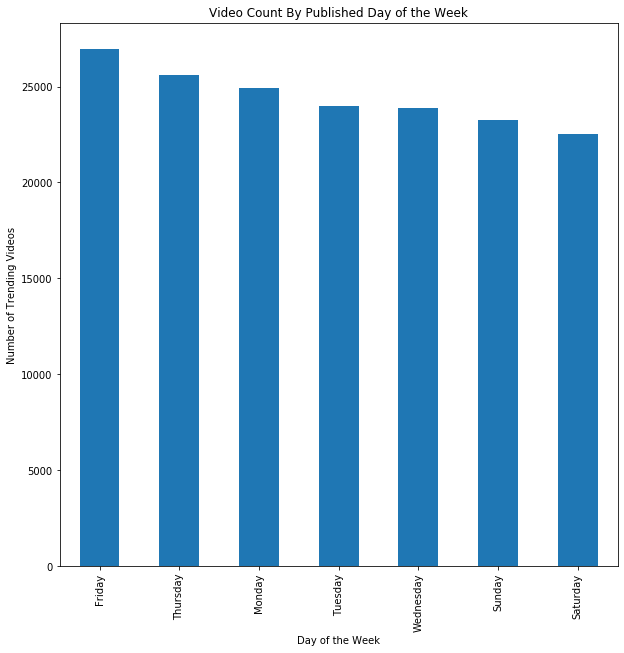

In [41]:
# Bar Plot by Publish Date of the week 
# 0 = Mon, 1 = Tues, 2 = Wed, 3 = Thurs, 4 = Fri, 5 = Sat, 6 = Sun

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
publish_day_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Published Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Trending Videos')

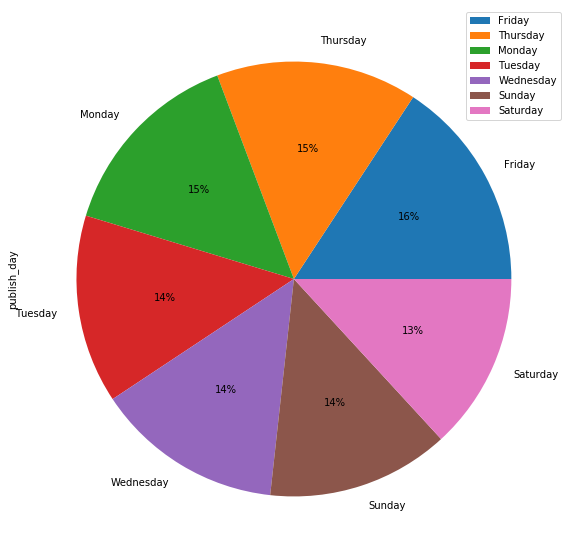

In [42]:
df5 = pd.DataFrame(publish_day_count)
plot = df5.plot.pie(subplots = True, figsize=(10, 10), autopct='%1.0f%%')

### ••• DAYS ON THE PLATFORM (PUBLISH DATE vs TRENDING DATE) ••• 

* The overwhelming majority of trending videos have been on the platform for less than a day 56%, with  85% for less than 3 days. 
* This shows a clear correlation between the publish date and trending day. That videos tend to trend within days if not hours from the date published. 
* In this perhaps an indication of viewer's attention span?

In [49]:
df['Time_Live'] = df['trending_timestamp'] - df['publish_timestamp']

In [62]:
df.head(100)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day,trending_day,Time_Live,Days_Live
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44,Sunday,Tuesday,1 days 06:01:03,1
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9,Sunday,Tuesday,1 days 10:13:42,1
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8,Sunday,Tuesday,1 days 04:51:52,1
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22,Monday,Tuesday,0 days 04:01:27,0
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6,Monday,Tuesday,0 days 10:26:34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-bqyTKrGq18,2017-11-14,DÉFIS TECHNIQUE INCROYABLE ! FOOTBALL SKILLS,Foot Familya,17,Sports,2017-11-12,11:30:06,"football""|""freestyle""|""skills""|""psg""|""messi""|""...",55916,3258,59,208,https://i.ytimg.com/vi/-bqyTKrGq18/default.jpg,False,False,False,Acheter de superbes maillots de football dans ...,FR,2017-11-12 11:30:06,2017-11-14,10.931624,8.089176,4.094345,5.342334,17,Sunday,Tuesday,1 days 12:29:54,1
96,LucUgZucG9M,2017-11-14,JE REFAIS DES PHOTOS ! #DÉFI,GREED,24,Entertainment,2017-11-12,15:59:41,"funny""|""humour""|""divertissement""|""ride""|""rider...",97976,7397,157,426,https://i.ytimg.com/vi/LucUgZucG9M/default.jpg,False,False,False,🎥 Nouvelle vidéo tous les DIMANCHES à 17h et\n...,FR,2017-11-12 15:59:41,2017-11-14,11.492488,8.908965,5.062595,6.056784,49,Sunday,Tuesday,1 days 08:00:19,1
97,1Cat-Fxks_s,2017-11-14,La cuisson des œufs à la coque différente au M...,Les Grosses Têtes,23,Comedy,2017-11-13,17:21:14,"Les Grosses Têtes""|""Laurent Ruquier""|""divertis...",2042,27,0,1,https://i.ytimg.com/vi/1Cat-Fxks_s/default.jpg,False,False,False,Arielle Dombasle nous apprend que selon le pay...,FR,2017-11-13 17:21:14,2017-11-14,7.622175,3.332205,0.000000,0.693147,27,Monday,Tuesday,0 days 06:38:46,0
98,w9_TuLo3Ao0,2017-11-14,ملخص مباراة المغرب وكوت ديفوار 2-0 شاشة كاملة ...,عيونك,17,Sports,2017-11-11,19:19:47,"ملخص مباراة المغرب وكوت ديفوار""|""المغرب""|""مبار...",738052,2571,581,730,h

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 30 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [53]:
df["Days_Live"] = None

In [54]:
df["Days_Live"] = df["Time_Live"].dt.days

In [64]:
df.head(100)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,trending_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tag_count,publish_day,trending_day,Time_Live,Days_Live
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,2017-11-14,9.877554,7.375882,3.178054,5.375278,44,Sunday,Tuesday,1 days 06:01:03,1
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,2017-11-14,9.940061,6.940222,6.326149,5.497168,9,Sunday,Tuesday,1 days 10:13:42,1
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,2017-11-14,12.242660,7.255591,5.003946,4.510860,8,Sunday,Tuesday,1 days 04:51:52,1
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,2017-11-14,9.674074,4.962845,2.397895,2.079442,22,Monday,Tuesday,0 days 04:01:27,0
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,2017-11-14,11.518987,7.056175,3.891820,3.583519,6,Monday,Tuesday,0 days 10:26:34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-bqyTKrGq18,2017-11-14,DÉFIS TECHNIQUE INCROYABLE ! FOOTBALL SKILLS,Foot Familya,17,Sports,2017-11-12,11:30:06,"football""|""freestyle""|""skills""|""psg""|""messi""|""...",55916,3258,59,208,https://i.ytimg.com/vi/-bqyTKrGq18/default.jpg,False,False,False,Acheter de superbes maillots de football dans ...,FR,2017-11-12 11:30:06,2017-11-14,10.931624,8.089176,4.094345,5.342334,17,Sunday,Tuesday,1 days 12:29:54,1
96,LucUgZucG9M,2017-11-14,JE REFAIS DES PHOTOS ! #DÉFI,GREED,24,Entertainment,2017-11-12,15:59:41,"funny""|""humour""|""divertissement""|""ride""|""rider...",97976,7397,157,426,https://i.ytimg.com/vi/LucUgZucG9M/default.jpg,False,False,False,🎥 Nouvelle vidéo tous les DIMANCHES à 17h et\n...,FR,2017-11-12 15:59:41,2017-11-14,11.492488,8.908965,5.062595,6.056784,49,Sunday,Tuesday,1 days 08:00:19,1
97,1Cat-Fxks_s,2017-11-14,La cuisson des œufs à la coque différente au M...,Les Grosses Têtes,23,Comedy,2017-11-13,17:21:14,"Les Grosses Têtes""|""Laurent Ruquier""|""divertis...",2042,27,0,1,https://i.ytimg.com/vi/1Cat-Fxks_s/default.jpg,False,False,False,Arielle Dombasle nous apprend que selon le pay...,FR,2017-11-13 17:21:14,2017-11-14,7.622175,3.332205,0.000000,0.693147,27,Monday,Tuesday,0 days 06:38:46,0
98,w9_TuLo3Ao0,2017-11-14,ملخص مباراة المغرب وكوت ديفوار 2-0 شاشة كاملة ...,عيونك,17,Sports,2017-11-11,19:19:47,"ملخص مباراة المغرب وكوت ديفوار""|""المغرب""|""مبار...",738052,2571,581,730,h

In [68]:
days_live_count = df['Days_Live'].value_counts()
print(days_live_count)

 0       95410
 1       36631
 2       12972
-1       10024
 3        5021
         ...  
 1356        1
 77          1
 333         1
 461         1
 698         1
Name: Days_Live, Length: 394, dtype: int64


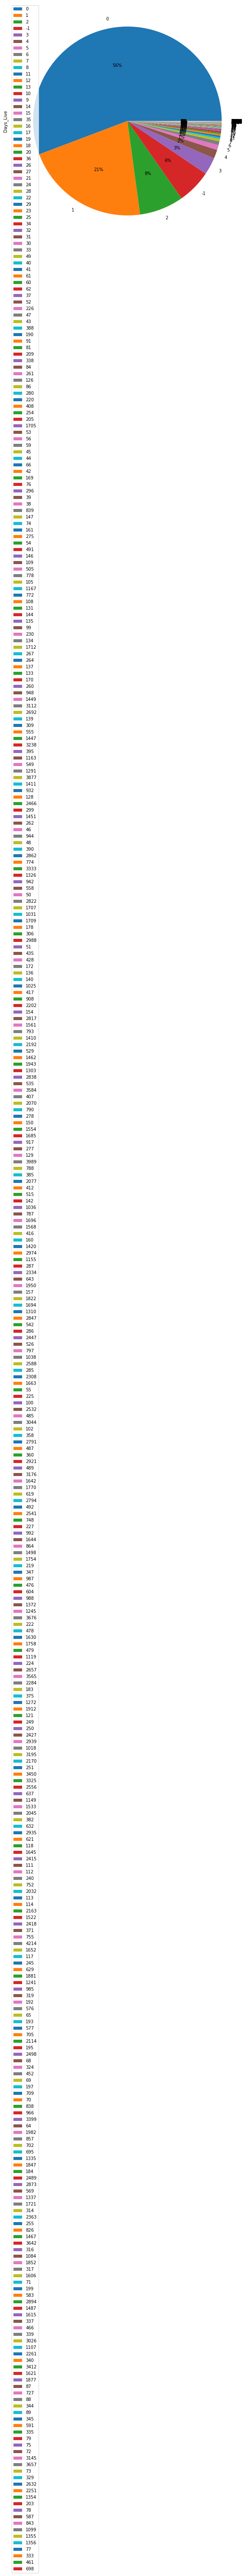

In [71]:
df7 = pd.DataFrame(days_live_count)
plot = df7.plot.pie(subplots = True, figsize=(10, 10), autopct='%1.0f%%')

### ••• MULTIPLE TRENDERS •••

* If you aggregate the total number of videos trending by channel, almost 50% of those channels had more than one video trending. With the top 25% of channels, having at least 4 trending videos. 
* Viewers tend to see videos from the same channel OR presumably, this property feeds into suggestion algorithms and viewers that see 1 video from a channel may be suggested to see another. 
* This presents an opportunity for the Youtube Creator to have more than one video trending within a short timespan and for Youtube to encourage more trending videos. 
* If a Creator achieves trending with 1 video, two things may happen: there is a potentail correlation that either one of his/her existing videos can increase in viewership OR if the creator posts another video, that new video may benefit from the popularity of the previous. 
* Assuming the creator does not proactively see this connection, Youtube (who is most likely already suggesting to viewers to see videos from the same channel) may now encourage via prompts or incentives more video uploads in a short period of time from the same creator to build on momentum

In [57]:
channel_count_series = df['channel_title'].value_counts()
print(channel_count_series)

SET India                             253
SAB TV                                248
VikatanTV                             240
The Late Show with Stephen Colbert    230
Анатолий Шарий                        224
                                     ... 
MCDAVO                                  1
Technical Patel                         1
Shizarium                               1
Deejay Maquina                          1
Гельмут Вайссвальд                      1
Name: channel_title, Length: 33965, dtype: int64


In [58]:
channel_count_series.describe()

count    33965.000000
mean         5.038981
std         12.047872
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        253.000000
Name: channel_title, dtype: float64

In [171]:
channel_count = pd.DataFrame(df.channel_title.value_counts().reset_index().values, columns=["channel_title", "VideoCount"])
channel_count

,channel_title,VideoCount
0,SET India,253
1,SAB TV,248
2,VikatanTV,240
3,The Late Show with Stephen Colbert,230
4,Анатолий Шарий,224
...,...,...
33960,MCDAVO,1
33961,Technical Patel,1
33962,Shizarium,1
33963,Deejay Maquina,1


In [60]:
multiple_trender = channel_count['VideoCount'] >1
channel_count[multiple_trender]

,channel_title,VideoCount
0,SET India,253
1,SAB TV,248
2,VikatanTV,240
3,The Late Show with Stephen Colbert,230
4,Анатолий Шарий,224
...,...,...
16399,Sólo Ellas 4,2
16400,Коллекция Рецептов,2
16401,اعلانات مسلسل تركي,2
16402,메이리우 Korean Sister,2


In [61]:
# From the channels with trending videos, almost 50% are concurrently trending more than one video

# From Previous calculations
Total_VideoCount_DF = 171149          # df.describe()
Total_ChannelCount_DF = 33965         # channel_count_series.describe()
Multiple_TrenderCount_Df = 16404      # multiple_trender view

Multiple_TrenderCount_Df/Total_ChannelCount_DF

0.48296776093036947

## CONCLUSION 

### QUESTIONS TO EXPLORE

WHAT? 
* Is there a correlation between CONTENT properties inputted by the creator and trendability?
    * YES!
    * Category "Entertainment" is by far the most frequently used by trending videos
    * The vast majority of videos (98%) are open to comments and ratings
    * The following content suggestions are in line with most trending videos:
        * Description length should be within 225 and 536 characters
        * Tag count should be within 7 and 25 tags and should not be left blank (as every trending video had at least 1)
* Is there a correlation between the creator's publishing TIMELINE and trendability?
    * YES! 
    * The vast majority of trending videos (85%) achieved trending within 3 days of being published with 56% within the day.
    * Creators slightly favor weekdays over weekends to upload videos. 

WHY?
* For Creators, are there any opportunities and or suggested behavior to encourage trendability?
    * YES! 
    * A creator looking for trendability should use the upload content properties and timeline of past trending videos as a guideline.
* For Youtube, is it worthwhile to spend additional resources on the Youtube Creator? Are there any suggested changes to the existing platform?
    * YES!
    * Creators are the lifeline of Youtube. It is important they have the tools to do well and are guided by Youtube. Any support in training and or product development from Youtube to the creators can positively contribute to the continued success and usage of the platform. 


### WHAT IS NEXT FOR PROJECT?

* Qualitative Analysis: Particularly on Tags and Description
* Closer look at qualities provided for Multiple Trenders